In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sage.all import exp, pi, I, GF

In [8]:
def plot_finite_field(q,output_filename=None):
    # Step 1: Compute the finite field F_q
    F = GF(q, repr="poly")  # Finite field of order q
    p = F.characteristic()  # Characteristic of the field
    r = F.degree()          # Degree of the extension

    # Step 2: Compute vector space representation and generator powers
    alpha = F.multiplicative_generator()  # Primitive element (generator)
    nonzero_elements = [alpha**k for k in range(q-1)]

    # Step 3: Map each element to a root of unity
    roots_of_unity = [exp(2 * pi * I * k / (q - 1)) for k in range(q-1)]

    # Step 4: Place roots of unity on a unit circle
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_aspect('equal', adjustable='datalim')
    ax.plot(np.cos(np.linspace(0, 2*np.pi, 1000)), np.sin(np.linspace(0, 2*np.pi, 1000)), 'k-')  # Unit circle

    # Plot the zero element
    ax.plot(0, 0, 'ko', markersize=5)  # Black circle for zero, smaller size
    ax.text(0.05, 0, "0", fontsize=8, ha='center', va='center', color='black')

    # Plot and label elements
    for k, (root, vector) in enumerate(zip(roots_of_unity, nonzero_elements)):
        x, y = root.real(), root.imag()
        ax.plot(x, y, 'bo')  # Point on the circle

        # Format vector as a sum of monomials
        vector_repr = " + ".join(f"{c}x^{i}" for i, c in enumerate(vector.polynomial().coefficients(sparse=False)))
        label = f"$\\alpha^{{{k}}} = {vector_repr}$"
        ax.text(x * 1.2, y * 1.2, label, fontsize=8, ha='center')

    # Step 5: Subfield F_p elements and connect them with a line
    subfield_elements = [alpha^(k*(q-1)//(p-1)) for k in range(p-1)]
    subfield_roots = [exp(2 * pi * i * k / (p-1)) for k in range(p-1)]
    subfield_points = [(root.real(), root.imag()) for root in subfield_roots]
    
    for x, y in subfield_points:
        ax.plot(x, y, 'ro')  # Subfield points in red
    subfield_x, subfield_y = zip(*subfield_points)
    ax.plot(subfield_x + (subfield_x[0],), subfield_y + (subfield_y[0],), 'r-', label=f"$F_{{{p}}}$ subfield")

    # Adjust bounding box and margins
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_title(f"Finite Field $F_{{{q}}}$ Visualization", fontsize=16)
    ax.legend(loc='upper right')
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

    # Save the image if an output filename is provided
    if output_filename:
        plt.savefig(output_filename, format='jpeg', dpi=int(300), bbox_inches='tight')
        
    plt.show()

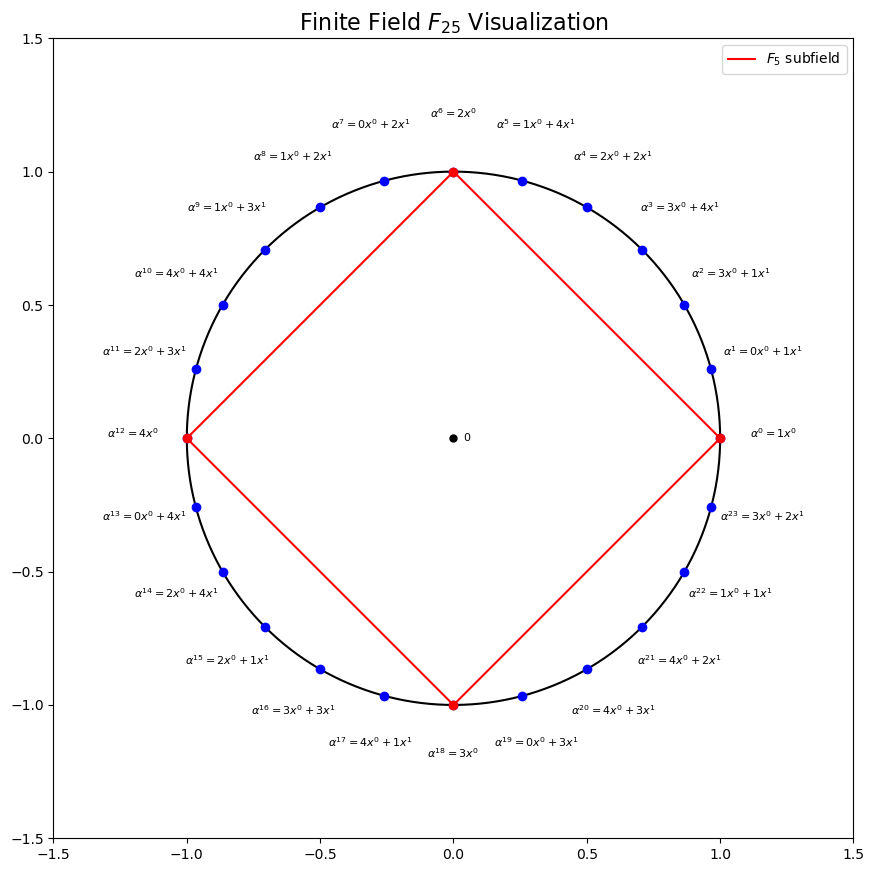

In [9]:
# Example usage
p = 5; r = 2; q = p**r;
plot_finite_field(5**2, output_filename=f"images/finite_field_{q}.jpeg")

In [ ]:
def plot_finite_field(q, output_filename=None):

    F = GF(q, repr="poly")  # Finite field of order q
    p = F.characteristic()  # Characteristic of the field
    r = F.degree()          # Degree of the extension

    alpha = F.multiplicative_generator()  # Primitive element (generator)
    nonzero_elements = [alpha^k for k in range(q-1)]

    # Compute roots of unity for plotting
    roots_of_unity = [exp(2 * pi * I * k / (q - 1)) for k in range(q - 1)]

    # Initialize the plot
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_aspect('equal', adjustable='datalim')
    ax.plot(np.cos(np.linspace(0, 2 * np.pi, 1000)), np.sin(np.linspace(0, 2 * np.pi, 1000)), 'k-')  # Unit circle

    # Plot the zero element
    ax.plot(0, 0, 'ko', markersize=5)  # Black circle for zero, smaller size
    ax.text(0.05, 0, "0", fontsize=8, ha='center', va='center', color='black')

    # Plot the main field elements
    for k, root in enumerate(roots_of_unity):
        x, y = root.real(), root.imag()
        ax.plot(x, y, 'bo')  # Point on the circle

    # Plot and label elements
    for k, (root, vector) in enumerate(zip(roots_of_unity, nonzero_elements)):
        x, y = root.real(), root.imag()
        ax.plot(x, y, 'bo')  # Point on the circle

        # Format vector as a sum of monomials
        vector_repr = " + ".join(f"{c}x^{i}" for i, c in enumerate(vector.polynomial().coefficients(sparse=False)))
        label = f"$\\alpha^{{{k}}} = {vector_repr}$"
        ax.text(x * 1.2, y * 1.2, label, fontsize=8, ha='center')

    # Add the subfield and other coordinate axes
    colors = plt.cm.jet(np.linspace(0, 1, r))  # Colors for each "line"
    for i in range(r):
        transformed_roots = [exp(2 * pi * I * ((k+i) / (q - 1))) for k in range(-(q-1)/(p-1), q-1, (q-1)/(p-1))]
        transformed_points_xy = [(root.real(), root.imag()) for root in transformed_roots]

        # Plot the transformed axis
        x_vals, y_vals = zip(*transformed_points_xy)
        ax.plot(x_vals, y_vals, 'o-', color=colors[i], label=f"$x^{i}$ axis")

    # Adjust plot aesthetics
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_title(f"Finite Field Axes $F_{{{q}}}$", fontsize=16)
    ax.legend(loc='upper right')

    # Remove axes and border
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    ax.axis('off')

    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

    # Save the image if an output filename is provided
    if output_filename:
        plt.savefig(output_filename, format='jpeg', dpi=int(300), bbox_inches='tight')
        
    plt.show()


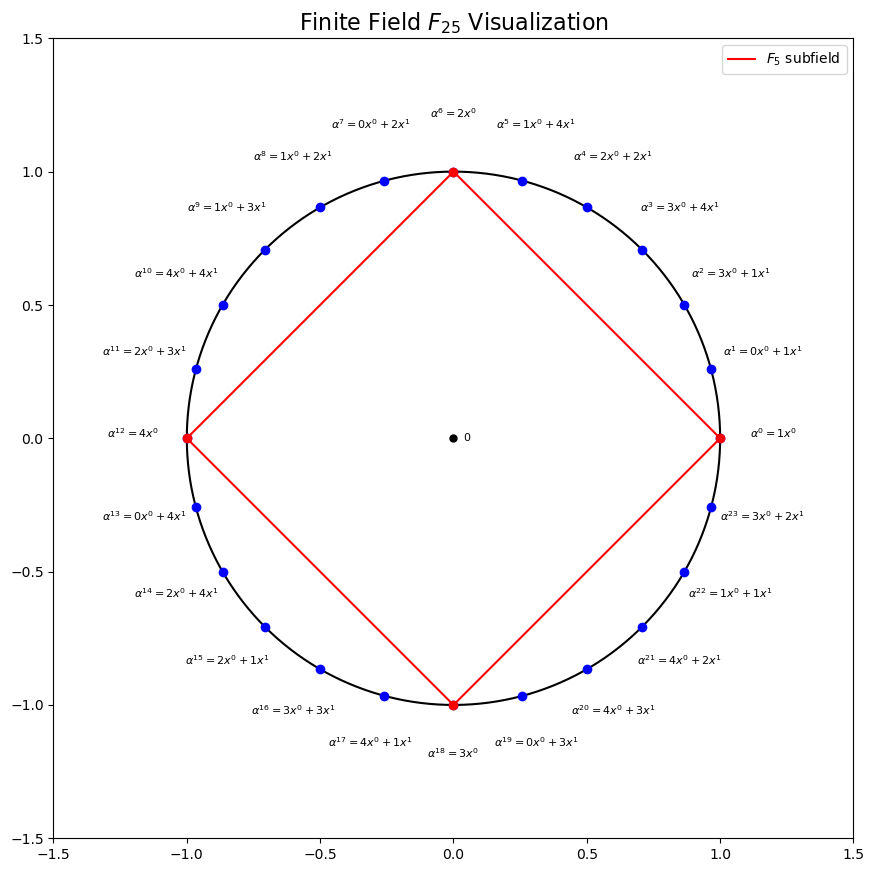

In [10]:
# Example usage
p = 5; r = 2; q = p**r;
plot_finite_field(q, output_filename=f"images/finite_field_axes_{q}.jpeg")

In [107]:
"""
- note Proj(F_q) is defined as the set of all lines through the origin in the vector space F_{q^2}
- we can compute all of these by computing F_q*{v} for each "direction" v \in F_{q^2}
- since each line contains the origin, each "line" will be a discrete circle with q-1 points, and the origin
"""
def plot_projective_line_finite_field(q, output_filename=None):

    F = GF(q, repr="poly")  # Finite field of order q
    p = F.characteristic()  # Characteristic of the field
    #r = F.degree()          # Degree of the extension

    alpha = F.multiplicative_generator()  # Primitive element (generator)
    nonzero_elements = [alpha^k for k in range(q-1)]
    num_lines = (q-1) // (p-1)

    #compute the lines in projective space over F_{q^2}, i.e. F_q*{v} for each "direction" v in F_{q^2}
    #F_q = [alpha^(k * (q - 1) // (p - 1)) for k in range(p - 1)]
    #note that nonzero elements are just alpha^k for k in range(q-1)
    lines = []
    for j in range(num_lines):
        line = [alpha^(j + k * num_lines) for k in range(p-1)]
        lines.append(line)

    # Compute roots of unity for plotting
    roots_of_unity = [exp(2 * pi * I * k / (q - 1)) for k in range(q - 1)]

    # Initialize the plot
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_aspect('equal', adjustable='datalim')
    ax.plot(np.cos(np.linspace(0, 2 * np.pi, 1000)), np.sin(np.linspace(0, 2 * np.pi, 1000)), 'k-')  # Unit circle

    # Plot the zero element
    ax.plot(0, 0, 'ko', markersize=5)  # Black circle for zero, smaller size
    ax.text(0.05, 0, "0", fontsize=8, ha='center', va='center', color='black')

    # Plot the main field elements
    for k, root in enumerate(roots_of_unity):
        x, y = root.real(), root.imag()
        ax.plot(x, y, 'bo')  # Point on the circle
    
        # Plot and label elements
    for k, (root, vector) in enumerate(zip(roots_of_unity, nonzero_elements)):
        x, y = root.real(), root.imag()
        ax.plot(x, y, 'bo')  # Point on the circle

        # Format vector as a sum of monomials
        coeffs = vector.polynomial().coefficients(sparse=False)
        vector_repr = " + ".join(
            f"{c}x^{i}" if i > 0 else f"{c}" for i, c in enumerate(coeffs) if c != 0
        ).replace("1x", "x").replace("x^1", "x")  # Remove redundant "1x"

        label = f"$\\alpha^{{{k}}} = {vector_repr}$"
        
        #manually adjust the label position for elements near the top of the circle
        if abs(y) == 1.0:
            y_offset = 0.1
        elif abs(y) < 1.0 and abs(y) > 0.9:
            y_offset = 0.06
        elif abs(y) <= 0.9 and abs(y) > 0.8:
            y_offset = 0.025
        else:
            y_offset = 0.0

        ax.text(float(x) * 1.2, float(y) * 1.2 + sign(y)*y_offset, label, fontsize=8, ha="center", va="center")

    # Add the subfield and other coordinate axes
    colors = plt.cm.rainbow(np.linspace(0, 1, num_lines))  # Colors for each "line"
    for i in range(num_lines):
        transformed_roots = [exp(2 * pi * I * ((k+i) / (q - 1))) for k in range(-num_lines, q-1, num_lines)]
        transformed_points_xy = [(root.real(), root.imag()) for root in transformed_roots]

        # Plot the transformed axis
        x_vals, y_vals = zip(*transformed_points_xy)
        ax.plot(x_vals, y_vals, 'o-', color=colors[i], label=f"$F_{{{p}}} \\alpha^{i}$")

    # Adjust plot aesthetics
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_title(f"Lines through origin in $F_{{{q}}}$", fontsize=16)
    ax.legend(loc='upper right')

    # Remove axes and border
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    ax.axis('off')

    # Save the image if an output filename is provided
    if output_filename:
        plt.savefig(output_filename, format='jpeg', dpi=int(300), bbox_inches='tight')
        
    plt.show()

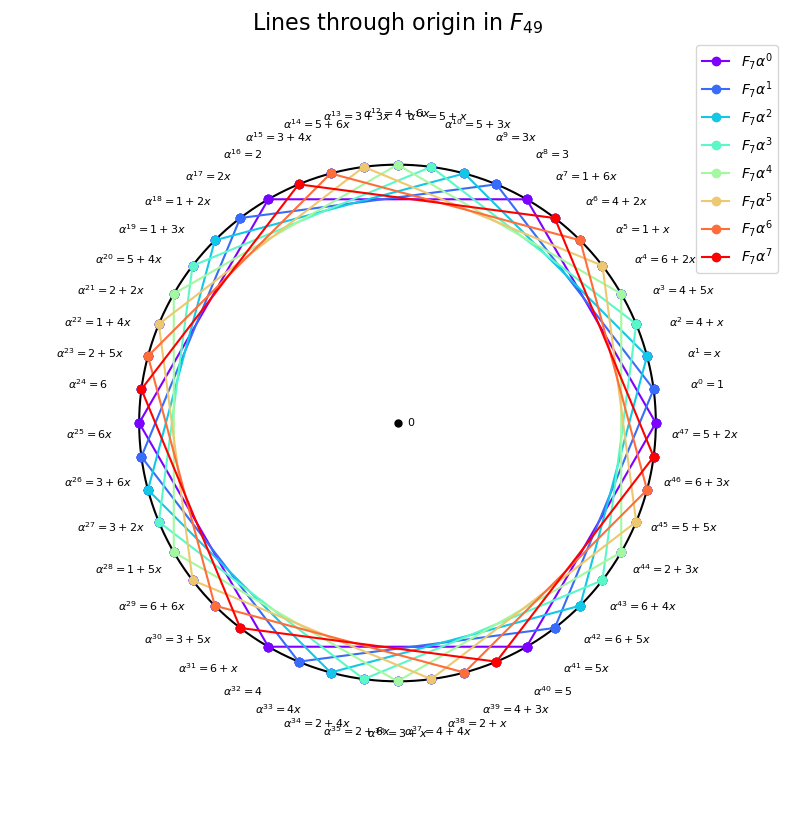

In [106]:
p = 7; r = 2; q = p**r;
plot_projective_line_finite_field(q, output_filename=f"images/lines_through_origin_finite_field_{q}.jpeg")